In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_column", None)
pd.set_option("display.max_row", None)

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
postpartum_df = pd.read_csv("../Dataset/postpartum.csv", delimiter=";", encoding="ISO-8859-1")

In [3]:
postpartum_df.head()

,Participant_number,Type_parents,Birth_1mth_M_inclusion,Birth_12mth_M_inclusion,Age,Marital_status,Marital_status_Autre,Marital_status_edit,Education,Gestationnal_age,Type_pregnancy,sex_baby1,CBTS_M_3,CBTS_M_4,CBTS_M_5,CBTS_M_6,CBTS_M_7,CBTS_M_8,CBTS_M_9,CBTS_M_10,CBTS_M_11,CBTS_M_12,CBTS_13,CBTS_14,CBTS_15,CBTS_16,CBTS_17,CBTS_18,CBTS_19,CBTS_20,CBTS_21,CBTS_22,EPDS_1,EPDS_2,EPDS_3,EPDS_4,EPDS_5,EPDS_6,EPDS_7,EPDS_8,EPDS_9,EPDS_10,HADS_1,HADS_3,HADS_5,HADS_7,HADS_9,HADS_11,HADS_13,Child_survey_participation,Age_bb,IBQ_R_VSF_3_bb1,IBQ_R_VSF_4_bb1,IBQ_R_VSF_9_bb1,IBQ_R_VSF_10_bb1,IBQ_R_VSF_16_bb1,IBQ_R_VSF_17_bb1,IBQ_R_VSF_28_bb1,IBQ_R_VSF_29_bb1,IBQ_R_VSF_32_bb1,IBQ_R_VSF_33_bb1,Sleep_night_duration_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
0,1.0,1.0,1.0,1.0,34.0,2.0,NaN,2.0,5.0,37.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,0.0,2.0,2.0,0.0,2.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,6.0,NaN,7.0,NaN,7.0,NaN,NaN,7.0,6.0,NaN,10:00,3.0,2.0
1,2.0,1.0,1.0,1.0,33.0,2.0,NaN,2.0,5.0,42.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,1.0,4.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,4.0,11:00,0.0,4.0
2,3.0,1.0,1.0,1.0,37.0,2.0,NaN,2.0,5.0,41.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,2.0,0.0,3.0,0.0,1.0,1.0,1.0,NaN,NaN,4.0,4.0,3.0,1.0,4.0,NaN,NaN,12:00,1.0,2.0
3,4.0,1.0,1.0,1.0,31.0,2.0,NaN,2.0,5.0,37.5,1.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,3.0,3.0,1.0,2.0,2.0,1.0,1.0,3.0,2.0,5.0,2.0,1.0,3.0,NaN,NaN,NaN,5.0,NaN,11:00,2.0,1.0
4,5.0,1.0,1.0,1.0,36.0,1.0,NaN,1.0,5.0,40.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,2.0,6.0,2.0,4.0,2.0,2.0,4.0,5.0,6.0,6.0,10:30,1.0,4.0


In [4]:
postpartum_df.shape

(1048292, 64)

In [5]:
postpartum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048292 entries, 0 to 1048291
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Participant_number          410 non-null    float64
 1   Type_parents                410 non-null    float64
 2   Birth_1mth_M_inclusion      410 non-null    float64
 3   Birth_12mth_M_inclusion     410 non-null    float64
 4   Age                         410 non-null    float64
 5   Marital_status              410 non-null    float64
 6   Marital_status_Autre        2 non-null      object 
 7   Marital_status_edit         410 non-null    float64
 8   Education                   410 non-null    float64
 9   Gestationnal_age            410 non-null    float64
 10  Type_pregnancy              410 non-null    float64
 11  sex_baby1                   410 non-null    float64
 12  CBTS_M_3                    410 non-null    float64
 13  CBTS_M_4                   

In [6]:
postpartum_df = postpartum_df.loc[1:410, :]
postpartum_df = postpartum_df.drop(['Participant_number', 'Type_parents', 'Birth_1mth_M_inclusion',
       'Birth_12mth_M_inclusion', 'Marital_status_Autre', 'Marital_status_edit',
       'Child_survey_participation',
       'IBQ_R_VSF_3_bb1', 'IBQ_R_VSF_4_bb1', 'IBQ_R_VSF_9_bb1',
       'IBQ_R_VSF_10_bb1', 'IBQ_R_VSF_16_bb1', 'IBQ_R_VSF_17_bb1',
       'IBQ_R_VSF_28_bb1', 'IBQ_R_VSF_29_bb1', 'IBQ_R_VSF_32_bb1',
       'IBQ_R_VSF_33_bb1', 'Sleep_night_duration_bb1',
       'night_awakening_number_bb1', 'how_falling_asleep_bb1'], axis=1)

In [7]:
postpartum_df.describe()

,Age,Marital_status,Education,Gestationnal_age,Type_pregnancy,sex_baby1,CBTS_M_3,CBTS_M_4,CBTS_M_5,CBTS_M_6,CBTS_M_7,CBTS_M_8,CBTS_M_9,CBTS_M_10,CBTS_M_11,CBTS_M_12,CBTS_13,CBTS_14,CBTS_15,CBTS_16,CBTS_17,CBTS_18,CBTS_19,CBTS_20,CBTS_21,CBTS_22,EPDS_1,EPDS_2,EPDS_3,EPDS_4,EPDS_5,EPDS_6,EPDS_7,EPDS_8,EPDS_9,EPDS_10,HADS_1,HADS_3,HADS_5,HADS_7,HADS_9,HADS_11,HADS_13,Age_bb
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,30.188264,2.002445,4.078240,39.119315,1.012225,1.484108,0.528117,0.207824,0.728606,0.498778,0.366748,0.347188,0.224939,0.427873,0.449878,0.545232,0.902200,0.811736,1.014670,0.481663,1.276284,0.210269,1.410758,0.530562,1.163814,1.012225,0.498778,0.552567,1.442543,1.457213,0.902200,1.481663,0.755501,0.877751,0.787286,0.283619,1.308068,0.713936,1.662592,1.508557,0.701711,1.293399,0.647922,1.960880
std,4.363536,0.360411,1.001832,1.900218,0.110023,0.500359,0.868747,0.588565,0.953419,0.822850,0.745884,0.802416,0.636522,0.744460,0.862086,0.933333,1.075676,1.017619,1.077752,0.871825,1.084404,0.637698,1.110327,0.868665,1.080151,1.110267,0.728027,0.827114,1.072037,1.037887,1.000108,0.936871,0.999449,0.907333,0.883528,0.736147,0.867698,0.967018,0.961817,0.831695,0.830793,1.044115,0.850750,0.821545
min,19.000000,1.000000,1.000000,26.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,2.000000,3.000000,38.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,30.000000,2.000000,4.000000,39.200000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000
75%,33.000000,2.000000,5.000000,40.400000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000
max,47.000000,6.000000,5.000000,43.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [8]:
postpartum_df.head()

,Age,Marital_status,Education,Gestationnal_age,Type_pregnancy,sex_baby1,CBTS_M_3,CBTS_M_4,CBTS_M_5,CBTS_M_6,CBTS_M_7,CBTS_M_8,CBTS_M_9,CBTS_M_10,CBTS_M_11,CBTS_M_12,CBTS_13,CBTS_14,CBTS_15,CBTS_16,CBTS_17,CBTS_18,CBTS_19,CBTS_20,CBTS_21,CBTS_22,EPDS_1,EPDS_2,EPDS_3,EPDS_4,EPDS_5,EPDS_6,EPDS_7,EPDS_8,EPDS_9,EPDS_10,HADS_1,HADS_3,HADS_5,HADS_7,HADS_9,HADS_11,HADS_13,Age_bb
1,33.0,2.0,5.0,42.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0
2,37.0,2.0,5.0,41.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,2.0,0.0,3.0,0.0,1.0
3,31.0,2.0,5.0,37.5,1.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,3.0,3.0,1.0,2.0,2.0,1.0,3.0
4,36.0,1.0,5.0,40.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0
5,32.0,2.0,5.0,41.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [9]:
postpartum_df.shape

(410, 44)

In [10]:
postpartum_df.columns

Index(['Age', 'Marital_status', 'Education', 'Gestationnal_age',
       'Type_pregnancy', 'sex_baby1', 'CBTS_M_3', 'CBTS_M_4', 'CBTS_M_5',
       'CBTS_M_6', 'CBTS_M_7', 'CBTS_M_8', 'CBTS_M_9', 'CBTS_M_10',
       'CBTS_M_11', 'CBTS_M_12', 'CBTS_13', 'CBTS_14', 'CBTS_15', 'CBTS_16',
       'CBTS_17', 'CBTS_18', 'CBTS_19', 'CBTS_20', 'CBTS_21', 'CBTS_22',
       'EPDS_1', 'EPDS_2', 'EPDS_3', 'EPDS_4', 'EPDS_5', 'EPDS_6', 'EPDS_7',
       'EPDS_8', 'EPDS_9', 'EPDS_10', 'HADS_1', 'HADS_3', 'HADS_5', 'HADS_7',
       'HADS_9', 'HADS_11', 'HADS_13', 'Age_bb'],
      dtype='object')

In [11]:
features = postpartum_df.columns
features = list(features)
features.remove('HADS_13')
features.remove('Marital_status')
features.remove('Type_pregnancy')
features.remove('Gestationnal_age')
features.remove('sex_baby1')

for feature in features:
    postpartum_df[feature].fillna(int(postpartum_df[feature].mean()), inplace=True)

In [12]:
postpartum_df.dropna(inplace=True)

In [13]:
postpartum_df.shape

(409, 44)

In [14]:
postpartum_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409 entries, 1 to 409
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               409 non-null    float64
 1   Marital_status    409 non-null    float64
 2   Education         409 non-null    float64
 3   Gestationnal_age  409 non-null    float64
 4   Type_pregnancy    409 non-null    float64
 5   sex_baby1         409 non-null    float64
 6   CBTS_M_3          409 non-null    float64
 7   CBTS_M_4          409 non-null    float64
 8   CBTS_M_5          409 non-null    float64
 9   CBTS_M_6          409 non-null    float64
 10  CBTS_M_7          409 non-null    float64
 11  CBTS_M_8          409 non-null    float64
 12  CBTS_M_9          409 non-null    float64
 13  CBTS_M_10         409 non-null    float64
 14  CBTS_M_11         409 non-null    float64
 15  CBTS_M_12         409 non-null    float64
 16  CBTS_13           409 non-null    float64
 1

Text(0.5, 0, 'Anxiety and Depression level')

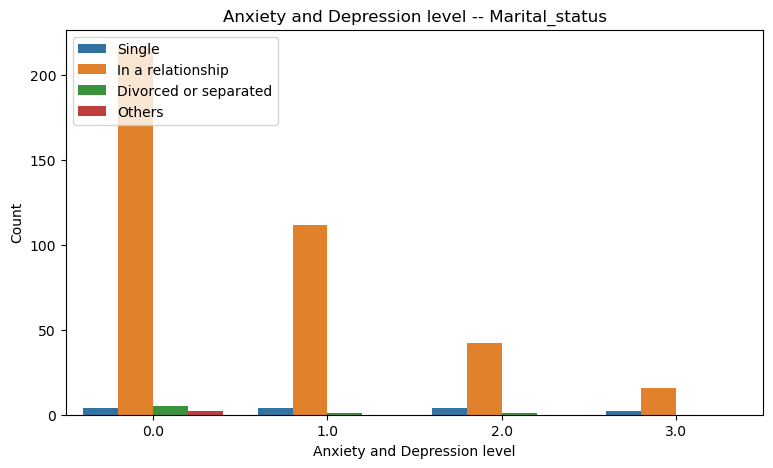

In [15]:
df_maritalStatus = postpartum_df.groupby(["Marital_status","HADS_13"]).size().reset_index(name = "Count")
plt.figure(figsize = (9,5))
sns.barplot(x = "HADS_13",y="Count", hue = "Marital_status", data = df_maritalStatus)
L=plt.legend()
L.get_texts()[0].set_text('Single')
L.get_texts()[1].set_text('In a relationship')
L.get_texts()[2].set_text('Divorced or separated')
L.get_texts()[3].set_text('Others')
plt.title("Anxiety and Depression level -- Marital_status")
plt.xlabel("Anxiety and Depression level")

Text(0.5, 0, 'Anxiety and Depression level')

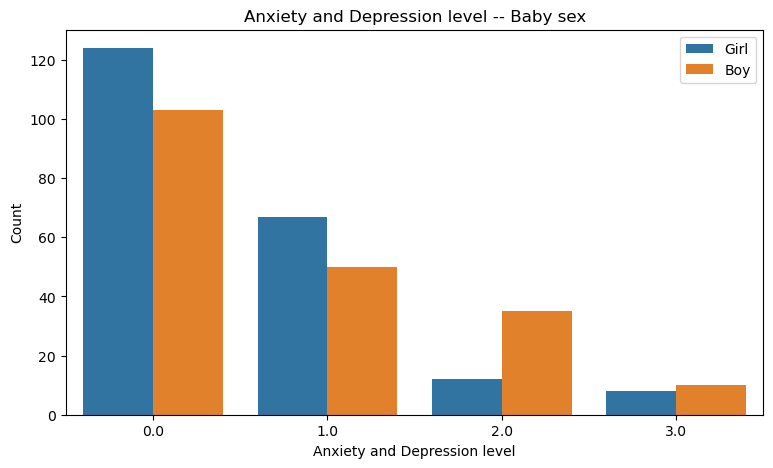

In [16]:
df_sexbaby = postpartum_df.groupby(["sex_baby1","HADS_13"]).size().reset_index(name = "Count")
plt.figure(figsize = (9,5))
sns.barplot(x = "HADS_13",y="Count", hue = "sex_baby1", data = df_sexbaby)
L=plt.legend()
L.get_texts()[0].set_text('Girl')
L.get_texts()[1].set_text('Boy')
plt.title("Anxiety and Depression level -- Baby sex")
plt.xlabel("Anxiety and Depression level")

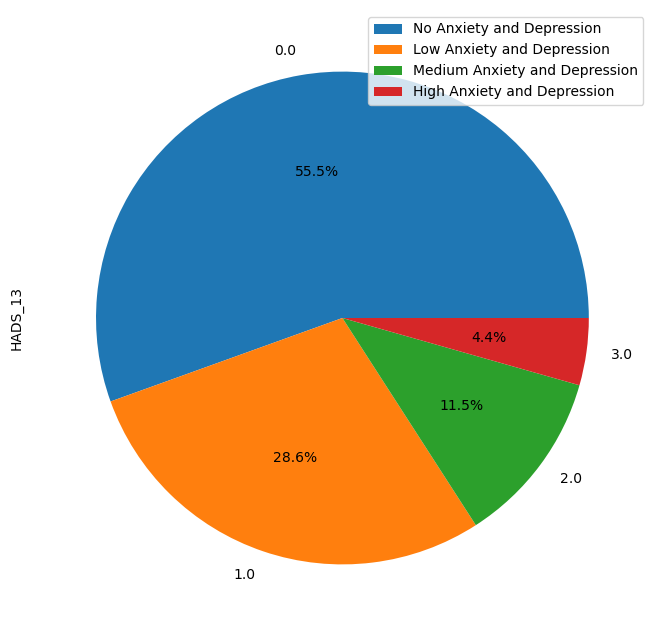

In [23]:
postpartum_df['HADS_13'].value_counts().plot.pie(explode = None, autopct = '%1.1f%%', shadow = False, figsize = (10,8))
L=plt.legend()
L.get_texts()[0].set_text('No Anxiety and Depression')
L.get_texts()[1].set_text('Low Anxiety and Depression')
L.get_texts()[2].set_text('Medium Anxiety and Depression')
L.get_texts()[3].set_text('High Anxiety and Depression')

In [17]:
x = postpartum_df.drop(['HADS_13'], axis=1)
y = postpartum_df['HADS_13']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5, stratify=y)

In [18]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.70      0.72        57
         1.0       0.34      0.38      0.36        29
         2.0       0.36      0.42      0.38        12
         3.0       0.67      0.40      0.50         5

    accuracy                           0.56       103
   macro avg       0.53      0.47      0.49       103
weighted avg       0.58      0.56      0.57       103

